In [14]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt
import math

In [15]:
m = mp.Model()

A = m.add_var(name='Cadeiras', var_type=mp.CONTINUOUS)
B = m.add_var(name='Mesas', var_type=mp.CONTINUOUS)

m.objective = mp.maximize(50 * A + 100 * B)

m += A <= 120
m += B <= 60
m += (A / 150) + (B / 110) <= 1

m.optimize()

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 1 (-2) rows, 2 (0) columns and 2 (-2) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj -0 Dual inf 168.18182 (2)
Clp0000I Optimal - objective value 9409.0909
Clp0000I Optimal - objective value 9409.0909
Clp0000I Optimal - objective value 9409.0909
Coin0511I After Postsolve, objective 9409.0909, infeasibilities - dual 0 (0), primal 0 (0)


<OptimizationStatus.OPTIMAL: 0>

Clp0032I Optimal objective 9409.090909 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


In [16]:
print(f"Produção de Cadeiras: {A.x:.0f}")
print(f"Produção de Mesas: {B.x:.0f}")
print(f"Max return: {math.floor(m.objective_value)}")

Produção de Cadeiras: 68
Produção de Mesas: 60
Max return: 9409


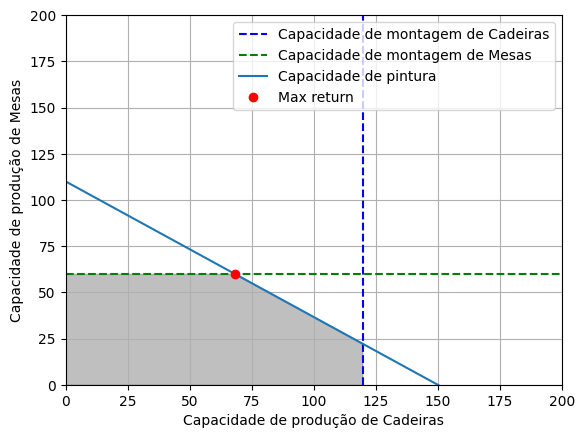

In [17]:
x = np.linspace(0, 200, 200)

r1 = 120
plt.axvline(x=r1, color='blue', linestyle='--', label="Capacidade de montagem de Cadeiras")

r2 = 60
plt.axhline(y=r2, color='green', linestyle='--', label="Capacidade de montagem de Mesas")

r3 = 110 * (1 - x / 150)
plt.plot(x, r3, label="Capacidade de pintura")

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.xlabel("Capacidade de produção de Cadeiras")
plt.ylabel("Capacidade de produção de Mesas")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, 0, np.minimum(np.minimum(r1, r2), r3), where=(x <= r1), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()